# Standardization
Standardizing the features so that they are centered around 0 with a standard deviation of 1. Tree-based classifier are probably the only classifiers where feature scaling doesn’t make a difference.
Some examples of algorithms where feature scaling matters are:

    * k-nearest neighbors with an Euclidean distance measure if want all features to contribute equally
    * k-means (see k-nearest neighbors)
    * logistic regression, SVMs, perceptrons, neural networks etc. if you are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others
    * linear discriminant analysis, principal component analysis, kernel principal component analysis since you want to find directions of maximizing the variance

# Min-Max scaling
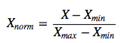

# Z-score standardization or Min-Max scaling
There is no obvious answer to this question: it really depends on the application

For example, in clustering analyses, standardization may be especially crucial in order to
compare similarities between features based on certain distance measures. Another prominent
example is the Principal Component Analysis, where we usually prefer standardization over
Min-Max scaling, since we are interested in the components that maximize the variance

However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is
image processing, where pixel intensities have to be normalized to fit within a certain range (i.e.,
0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a
0-1 scale.


# Standardizing and normalizing - using scikit-learn

In [19]:
import pandas as pd
import numpy as np

# import Wine data and just using first three columns
df = pd.read_csv("wine_data.csv", header = None, usecols=[0,1,2])


The Wine dataset consists of 3 different classes where each row correspond to a particular wine
sample.
The class labels (1, 2, 3) are listed in the first column, and the columns 2-14 correspond to 13
different attributes (features):

In [20]:
df.head()
    

,0,1,2
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87


In [21]:
df.columns = ['Class Label', 'Alcohal', 'MalicAcid']
df.head()

,Class Label,Alcohal,MalicAcid
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87


the features Alcohol (percent/volumne) and Malic acid (g/l)
are measured on different scales, so that Feature Scaling is necessary important prior to any
comparison or combination of these data.

Standardization and Min-Max scaling

In [22]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohal', 'MalicAcid']])
df_std = std_scale.transform(df[['Alcohal', 'MalicAcid']])

minmax_scale= preprocessing.MinMaxScaler().fit(df[['Alcohal', 'MalicAcid']])
df_minmax = minmax_scale.transform(df[['Alcohal', 'MalicAcid']])

In [23]:
print('Mean After standardization: \nAlcohal = {:.2f}, Malic Acid = {:.2f} \n'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))


print('Standard deviation After standardization: \nAlcohal = {:.2f}, Malic Acid = {:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean After standardization: 
Alcohal = -0.00, Malic Acid = -0.00 

Standard deviation After standardization: 
Alcohal = 1.00, Malic Acid = 1.00


In [24]:
print('Minimum value after MinMax scaling:\nAlcohal = {:.2f}, Malic Acid = {:,.2f} \n'
     .format(df_minmax[:,0].min(), df_minmax[:,1].min()))

print('Maxmum value after MinMax scaling:\nAlcohal = {:.2f}, Malic Acid = {:,.2f} \n'
     .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Minimum value after MinMax scaling:
Alcohal = 0.00, Malic Acid = 0.00 

Maxmum value after MinMax scaling:
Alcohal = 1.00, Malic Acid = 1.00 



# Plotting

In [25]:
import matplotlib.pyplot as plt

alcohal =df.Alcohal
acid = df.MalicAcid

def plot():
    plt.figure(figsize=(8,6))
    
    plt.scatter(alcohal,acid,color='green', label='input scale', alpha=0.5 )
    
    plt.scatter(df_std[:,0], df_std[:,1], color='red',
                label='Standardized [$N (\mu=0, \; \sigma=1)$]', alpha=0.3)
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],
                color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)
    
    plt.title('Alcohol and Malic Acid content of the wine dataset')
    
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    #plt.tight_layout()


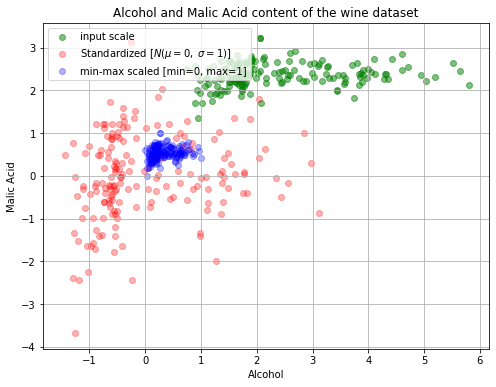

In [26]:
plot()
plt.show()

# The effect of standardization on PCA in a pattern classification task
Earlier, I mentioned the Principal Component Analysis (PCA) as an example where
standardization is crucial, since it is “analyzing” the variances of the different features.
Now, let us see how the standardization affects PCA and a following supervised classification
on the whole wine dataset.
In the following section, we will go through the following steps:
    
    * Dividing the dataset into a separate training and test dataset
    * Standardization of the features
    * Principal Component Analysis (PCA) to reduce the dimensionality
    * Training a naive Bayes classifier
    * Evaluating the classification accuracy with and without standardization

# Step 1:
Dividing the dataset into a separate training and test
dataset

In [42]:
from sklearn.model_selection import train_test_split

X_wine = df.values[:,1:]  # Sccond and third colums area the attributes
y_wine = df.values[:,0]   # while the first colums is the label (or target)

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
test_size=0.30, random_state=12345)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 2)
(54, 2)
(124,)
(54,)


# Step 2: Feature Scaling - Standardization

In [28]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
X_train_std = std_scale.fit_transform(X_train)
X_test_std = std_scale.transform(X_test)

# Step 3: Dimensionality reduction via Principal Component Analysis (PCA)

Now, we perform a PCA on the standardized and the non-standardized datasets to transform
the dataset onto a 2-dimensional feature subspace.
In a real application, a procedure like cross-validation would be done in order to find out what
choice of features would yield a optimal balance between “preserving information” and
“overfitting” for different classifiers. However, we will omit this step since we don’t want to train a
perfect classifier here, but merely compare the effects of standardization.

In [29]:
from sklearn.decomposition import PCA

# # on non-standardized data
pca = PCA(n_components=2)
x_train_reduced = pca.fit_transform(X_train)
x_test_reduced = pca.transform(X_test)

# # on standardized data
pca_std = PCA(n_components = 2)
x_train_std_reduced = pca_std.fit_transform(X_train_std)
x_test_std_reduced = pca_std.transform(X_test_std)

In [30]:
print('Number of PCA componets with out Standarization:', pca.n_components_)
print('Number of PCA componets with Standarization:',pca_std.n_components_)



Number of PCA componets with out Standarization: 2
Number of PCA componets with Standarization: 2


Let us quickly visualize how our new feature subspace looks like (note that class labels are not
considered in a PCA - in contrast to a Linear Discriminant Analysis - but I will add them in the
plot for clarity).

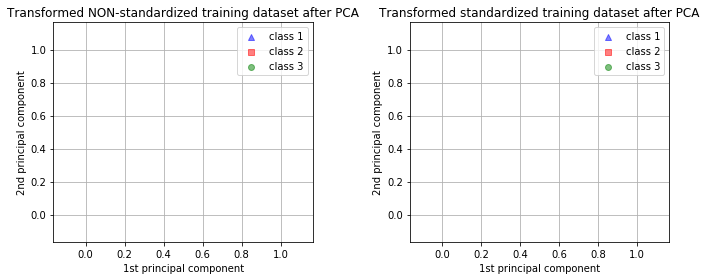

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(x_train_reduced[y_train==l, 0], x_train_reduced[y_train==l, 1], 
                color=c, label= 'class %s'%l, alpha=0.5, marker=m)
    
for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(x_train_std_reduced[y_train==l, 0], x_train_std_reduced[y_train==l, 1],
                color=c, label='class %o' %l, alpha=0.5, marker=m)
    
ax1.set_title('Transformed NON-standardized training dataset after PCA')
ax2.set_title('Transformed standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()
plt.show()



# Step 4: Training a naive Bayes classifier

In [44]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
#gnb = GaussianNB()
#fit = gnb.fit(X_train, y_train)

# on standardized data
gnb_std = GaussianNB()
fit_std = gnb_std.fit(X_train_std, y_train)


ValueError: Unknown label type: (array([11.03, 11.41, 11.46, 11.62, 11.64, 11.65, 11.66, 11.79, 11.81,
       11.84, 11.87, 11.96, 12.  , 12.04, 12.08, 12.16, 12.17, 12.2 ,
       12.21, 12.22, 12.25, 12.29, 12.33, 12.34, 12.37, 12.42, 12.43,
       12.45, 12.47, 12.51, 12.52, 12.53, 12.58, 12.6 , 12.67, 12.69,
       12.7 , 12.72, 12.77, 12.81, 12.82, 12.84, 12.85, 12.86, 12.87,
       12.88, 12.93, 12.96, 12.99, 13.03, 13.05, 13.07, 13.11, 13.16,
       13.17, 13.2 , 13.24, 13.28, 13.29, 13.3 , 13.36, 13.39, 13.4 ,
       13.41, 13.45, 13.49, 13.51, 13.52, 13.58, 13.62, 13.63, 13.67,
       13.68, 13.71, 13.72, 13.73, 13.75, 13.77, 13.78, 13.84, 13.86,
       13.88, 13.9 , 13.94, 14.02, 14.06, 14.12, 14.13, 14.19, 14.2 ,
       14.21, 14.23, 14.34, 14.37, 14.38, 14.39, 14.75, 14.83]),)

Evaluating the classification accuracy with and without
standardization

In [35]:
from sklearn import metrics

pred_train = gnb.predict(x_train_reduced)
print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(x_test_reduced)
print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

AttributeError: 'GaussianNB' object has no attribute 'class_prior_'

In [16]:
pred_train_std = gnb_std.predict(x_train_std_reduced)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std)))

pred_test_std = gnb_std.predict(x_test_std_reduced)
print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset
62.90%

Prediction accuracy for the test dataset
72.22%

